In [15]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Linear regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict pro_ts for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering di_erent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
pro_ts and populations from the cities.

**You would like to use this data to help you select which city to expand
to next.**
The file **ex1data1.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.
The ex1.m script has already been set up to load this data for you.


In [14]:
columns = ['population', 'profit']
foodTrucks = pd.read_csv('data/ex1data1.txt', header=None)
foodTrucks.columns = columns
foodTrucks.head(3)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


### 2.1 Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (prot and population). (Many
other problems that you will encount

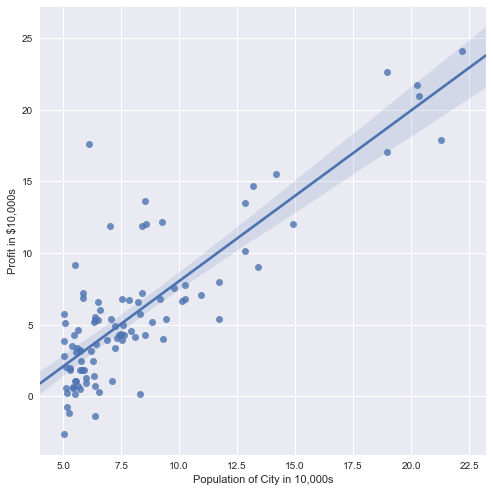

In [20]:
sns.lmplot(data= foodTrucks,x='population', y='profit', size=7)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s');

### 2.2 Gradient Descent
In this part, you will t the linear regression parameters  to our dataset
using gradient descent.
<img src='images/1.png'></img>
<img src='images/2.png'></img>
<img src='images/3.png'></img>

In [166]:
X = pd.DataFrame()
X['ones'] = np.ones(m)
X['population'] = foodTrucks.population.copy()
X.head(2)

y = foodTrucks.profit
y.head(2)

,ones,population
0,1.0,6.1101
1,1.0,5.5277


0    17.5920
1     9.1302
Name: profit, dtype: float64

In [113]:
def calculate_cost(theta, X, y):
    hypothesis = X*theta
    hypothesis = np.sum(hypothesis, axis=1)
    ans = hypothesis - y
    return (1./(2*m))* np.sum(np.power(ans,2))

theta = [0,0]
calculate_cost(theta, X, y)

32.072733877455654

<img src='images/4.png'></img>

In [215]:
def compute_hypothesis(theta, X):
    return np.sum(X*theta, axis=1)

theta = [1, 1]
(compute_hypothesis(theta, X) - y).head(2)

0   -10.4819
1    -2.6025
dtype: float64

In [496]:
m = foodTrucks.shape[0]
theta = [0,0]

X = pd.DataFrame()
X['ones'] = np.ones(m)
X['population'] = foodTrucks.population.copy()
X.head(2)

y = foodTrucks.profit
y.head(2)

,ones,population
0,1.0,6.1101
1,1.0,5.5277


0    17.5920
1     9.1302
Name: profit, dtype: float64

In [310]:
iterations = 1500
alpha = 0.01

cost_history = [];
theta_history = []
theta = [0,0]

for i in range(0, iterations):
    temp_theta = theta
    cost = calculate_cost(theta, X, y)
#good
    theta_history.append(list(temp_theta))
#buggy
#theta_history.append(temp_theta)
    cost_history.append(cost)
    for ind, t in enumerate(temp_theta):
        temp_theta[ind] = theta[ind] - (alpha/m)*np.sum((compute_hypothesis(theta, X)-y)*X.iloc[:,ind])
    theta = temp_theta


In [388]:
df = pd.DataFrame(cost_history)
df.columns = ['cost']
df['index'] = df.index.values
df.head(2)

,cost,index
0,32.072734,0
1,6.793728,1


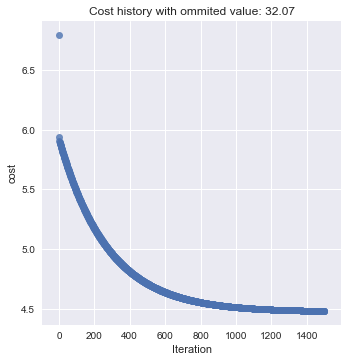

In [390]:
#visualize data without first cost value
sns.lmplot(x='index', y='cost', data=df[1:], fit_reg=False)
plt.xlabel('Iteration')
ommited = round(df.loc[0].cost, 2)
title = f'Cost history with ommited value: {ommited}'
plt.title(title)

In [409]:
foodTrucks['predicted_profit'] = np.sum(theta*X, axis=1)
foodTrucks.head(5)

,population,profit,predicted_profit
0,6.1101,17.5920,3.494357
1,5.5277,9.1302,2.814702
2,8.5186,13.6620,6.305050
3,7.0032,11.8540,4.536595
4,5.8598,6.8233,3.202260


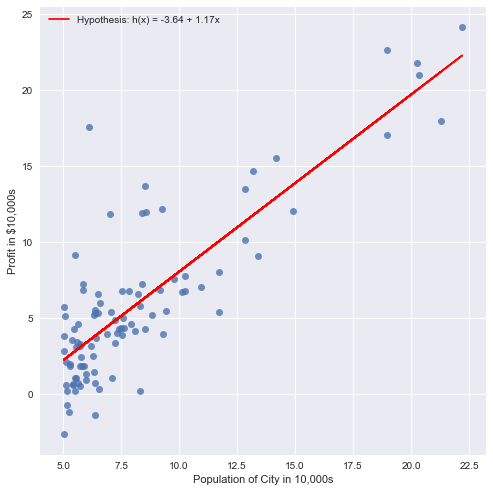

In [439]:
sns.lmplot(data= foodTrucks, x='population', y='profit', size=7, fit_reg=False)
label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1])
plt.plot(foodTrucks.population, foodTrucks.predicted_profit, 'r-',label =label)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s');
plt.legend()

<img src='images/5.png'></img>
<img src='images/6.png'></img>

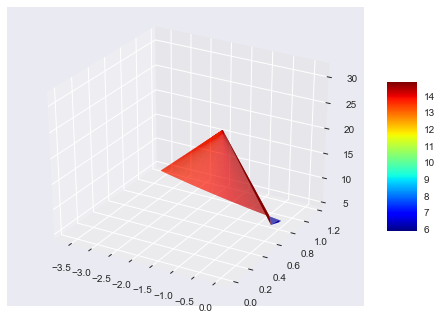

In [475]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = [theta[0] for theta in theta_history]
b = [theta[1] for theta in theta_history]
c = cost_history
# surf = ax.plot_surface(X=a, Y=b, Z=c, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
surf = ax.plot_trisurf(a,b,c, cmap=cm.jet, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.xaxis.set_major_locator(MaxNLocator(5))
# ax.yaxis.set_major_locator(MaxNLocator(6))
# ax.zaxis.set_major_locator(MaxNLocator(5))

plt.show()

In [504]:
features = pd.DataFrame()
features['ones'] = np.ones(m)
features['population'] = foodTrucks.population.copy()
features.head(2)

labels = foodTrucks.profit
labels.head(2)

,ones,population
0,1.0,6.1101
1,1.0,5.5277


0    17.5920
1     9.1302
Name: profit, dtype: float64

In [509]:
xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
X, Y, Z = [], [], []

for x_val in xvals:
    for y_val in yvals:
        theta = [x_val, y_val]
        X.append(x_val)
        Y.append(y_val)
        Z.append(calculate_cost(theta, features, labels))

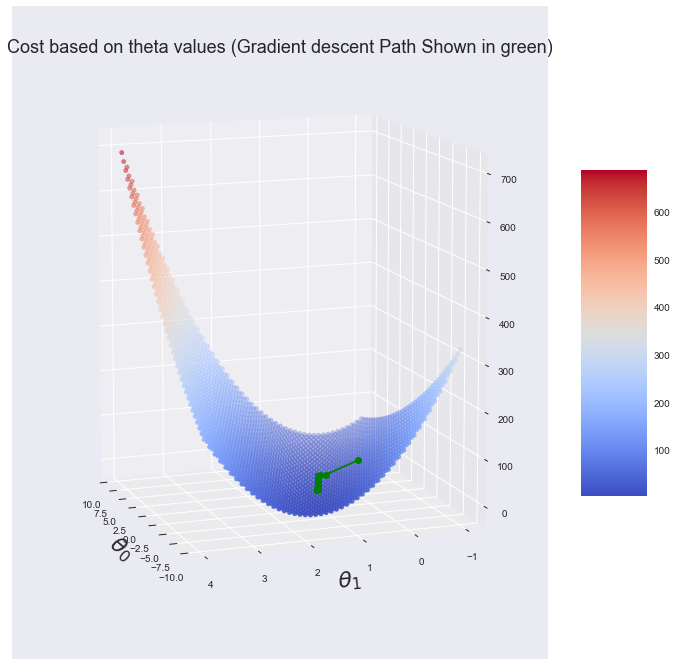

In [542]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(X,Y,Z,c=np.abs(Z),cmap=plt.get_cmap('coolwarm'))

plt.xlabel(r'$\theta_0$',fontsize=22)
plt.ylabel(r'$\theta_1$',fontsize=22)
plt.title('Cost based on theta values (Gradient descent Path Shown in green)',fontsize=18)

plt.plot([x[0] for x in theta_history],[x[1] for x in theta_history],cost_history,'go-')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=10., azim=160)
#     fig.savefig("scatter%d.png" % ii)
plt.show()